#**Toyota KM Dataset**
# Linear Regression Method

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_excel('/content/drive/MyDrive/Datasets/toyota_km.xlsx',na_values=['??']) #read from dataset

data.head() # view first few rows of the data

,x,r
0,46986.0,13500
1,72937.0,13750
2,41711.0,13950
3,48000.0,14950
4,38500.0,13750


In [ ]:
data = data.dropna()

In [ ]:
test_data = data.iloc[-100:]
test_data

,x,r
1331,65006.0,6950
1332,64280.0,8495
1333,64000.0,10000
1334,64000.0,6999
1335,64000.0,8950
...,...,...
1429,24000.0,8950
1430,23000.0,8450
1431,20544.0,7500
1433,17016.0,8500


In [ ]:
data = data[:-100]
data

,x,r
0,46986.0,13500
1,72937.0,13750
2,41711.0,13950
3,48000.0,14950
4,38500.0,13750
...,...,...
1326,65950.0,7400
1327,65500.0,8950
1328,65307.0,6900
1329,65254.0,7750


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1321 entries, 0 to 1330
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       1321 non-null   float64
 1   r       1321 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 31.0 KB


In [ ]:
#number of records n training data
size = data['x'].size
size

1321

Text(0.5, 1.0, 'Scatter')

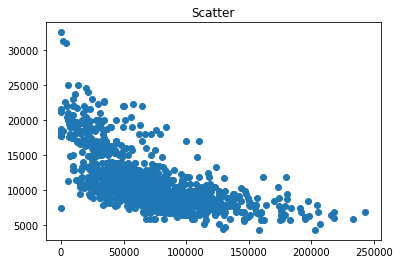

In [ ]:
plt.scatter(data['x'],data['r'])
plt.title('Scatter')

In [ ]:
data['x_sqr'] = data['x']**2
data

,x,r,x_sqr
0,46986.0,13500,2.207684e+09
1,72937.0,13750,5.319806e+09
2,41711.0,13950,1.739808e+09
3,48000.0,14950,2.304000e+09
4,38500.0,13750,1.482250e+09
...,...,...,...
1326,65950.0,7400,4.349402e+09
1327,65500.0,8950,4.290250e+09
1328,65307.0,6900,4.265004e+09
1329,65254.0,7750,4.258085e+09


In [ ]:
data['xr'] = data['x']*data['r']
data

,x,r,x_sqr,xr
0,46986.0,13500,2.207684e+09,6.343110e+08
1,72937.0,13750,5.319806e+09,1.002884e+09
2,41711.0,13950,1.739808e+09,5.818684e+08
3,48000.0,14950,2.304000e+09,7.176000e+08
4,38500.0,13750,1.482250e+09,5.293750e+08
...,...,...,...,...
1326,65950.0,7400,4.349402e+09,4.880300e+08
1327,65500.0,8950,4.290250e+09,5.862250e+08
1328,65307.0,6900,4.265004e+09,4.506183e+08
1329,65254.0,7750,4.258085e+09,5.057185e+08


In [ ]:
w1 = (sum(data['xr']) - sum(data['x'])*sum(data['r']/size)) / (sum(data['x_sqr'])-(sum(data['x'])**2/size))
w1

-0.05878823624952209

In [ ]:
w0 = sum(data['r'])/size - w1*sum(data['x'])/size
w0

14998.874935686585

In [ ]:
predicted = w0+w1*data['x']
predicted

0       12236.650867
1       10711.037348
2       12546.758813
3       12177.039596
4       12735.527840
            ...     
1326    11121.790755
1327    11148.245461
1328    11159.591591
1329    11162.707367
1330    11176.405027
Name: x, Length: 1321, dtype: float64

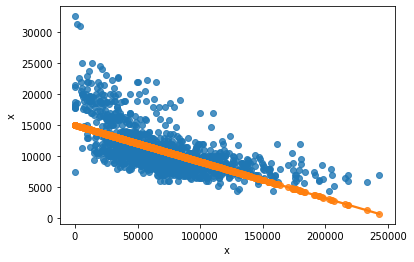

In [ ]:
sns.regplot(x = 'x',y = 'r',data = data,fit_reg=False)#.set(xlim=(0,10),ylim=(0,10))
sns.regplot(x = 'x',y = predicted,data = data)

In [ ]:
error = sum((data['r']-predicted)**2)/size
error

8215645.610687097

In [ ]:
test_predicted = w0+w1*test_data['x']
test_predicted

1331    11177.286850
1332    11219.967110
1333    11236.427816
1334    11236.427816
1335    11236.427816
            ...     
1429    13587.957266
1430    13646.745502
1431    13791.129410
1433    13998.534308
1435    14998.816147
Name: x, Length: 100, dtype: float64

In [ ]:
test_size = test_data['x'].size
test_size

100

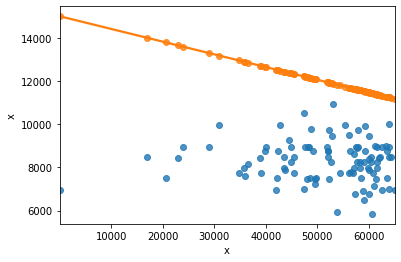

In [ ]:
sns.regplot(x = 'x',y = 'r',data = test_data,fit_reg=False)#.set(xlim=(0,10),ylim=(0,10))

sns.regplot(x = 'x',y = test_predicted,data = test_data)

In [ ]:
error = sum((test_data['r']-test_predicted)**2)/test_size
error

14866074.771807065

#**Toyota Age Dataset**
# Normal Equation Method

In [ ]:
# Normal equation method for one attribute dataset -one degree polynomial - 
# w0 + w1x

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
dataframe = pd.read_excel('/content/drive/MyDrive/Datasets/toyota_age.xlsx',na_values=['??']) #read from dataset
dataframe = dataframe.dropna()
dataframe.head() # view first few rows of the data


,x,r
0,23.0,13500
1,23.0,13750
2,24.0,13950
3,26.0,14950
4,30.0,13750


Text(0.5, 1.0, 'Scatter')

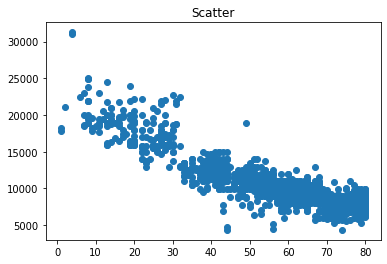

In [ ]:
plt.scatter(dataframe['x'],dataframe['r'])
#plt.scatter(dataframe['x2'],dataframe['r'])
plt.title('Scatter')

In [ ]:
test_size = 100

In [ ]:
dataframe = dataframe.iloc[:-test_size]
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1136 entries, 0 to 1212
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       1136 non-null   float64
 1   r       1136 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 26.6 KB


In [ ]:
test_dataframe = dataframe.iloc[-test_size:]
test_dataframe

,x,r
1104,80.0,7250
1105,77.0,7450
1106,74.0,7950
1108,71.0,8250
1109,76.0,8950
...,...,...
1206,73.0,7500
1208,70.0,7950
1209,78.0,7250
1211,80.0,8250


In [ ]:
data = np.asarray(dataframe)
test_data = np.asarray(test_dataframe)
(data)

array([[   23., 13500.],
       [   23., 13750.],
       [   24., 13950.],
       ...,
       [   78.,  7250.],
       [   80.,  8250.],
       [   72.,  8250.]])

In [ ]:
test_dataframe = data

In [ ]:
test_data

array([[  80., 7250.],
       [  77., 7450.],
       [  74., 7950.],
       [  71., 8250.],
       [  76., 8950.],
       [  74., 7750.],
       [  71., 8500.],
       [  78., 7750.],
       [  73., 5750.],
       [  76., 6900.],
       [  78., 6500.],
       [  77., 7600.],
       [  73., 8950.],
       [  74., 7450.],
       [  72., 7350.],
       [  73., 7750.],
       [  80., 7460.],
       [  76., 9250.],
       [  80., 7250.],
       [  72., 6500.],
       [  80., 6800.],
       [  75., 8700.],
       [  71., 7750.],
       [  73., 7950.],
       [  75., 9950.],
       [  74., 6640.],
       [  71., 8750.],
       [  72., 7750.],
       [  72., 5950.],
       [  77., 6750.],
       [  80., 6500.],
       [  76., 8750.],
       [  74., 7950.],
       [  74., 6750.],
       [  73., 7950.],
       [  80., 7950.],
       [  75., 8950.],
       [  77., 7750.],
       [  75., 6450.],
       [  74., 6900.],
       [  75., 8450.],
       [  74., 6750.],
       [  74., 8050.],
       [  7

In [ ]:
test_X = test_data[:,:-1]
test_r = test_data[:,-1:]

In [ ]:
X = data[:,:-1] # input attributes include all column except last
r = data[:,-1:] # output attribute include last column only

In [ ]:
X

array([[23.],
       [23.],
       [24.],
       ...,
       [78.],
       [80.],
       [72.]])

In [ ]:
r

array([[13500.],
       [13750.],
       [13950.],
       ...,
       [ 7250.],
       [ 8250.],
       [ 8250.]])

In [ ]:
ones = np.ones((len(X),1))

In [ ]:
ones

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]])

In [ ]:
D = np.hstack((ones,X))
D

array([[ 1., 23.],
       [ 1., 23.],
       [ 1., 24.],
       ...,
       [ 1., 78.],
       [ 1., 80.],
       [ 1., 72.]])

In [ ]:
ones = np.ones((len(test_X),1))
test_D = np.hstack((ones,test_X))

In [ ]:
class LR_Norm_Eqn:

  def __init__(self,m):
    # number of attributes 'm' is passed as an argument
    self.weights = np.zeros([m,1])    
  
  
  def predict(self, D, R): # retruns predicted 'r'
    temp = np.dot(D, self.weights) 
    return temp
    
  def measure(self, predicted, actual): # returns mean squared error
    temp = predicted- actual
    m = len(predicted) # number of records
    return (np.sum(np.power(temp, 2))) / (m)


  def fit(self,D,R):        
    
    D_transpose = np.transpose(D)
    
    D_trans_dot_D_Inv = np.linalg.inv(D_transpose.dot(D))

    D_trans_R = D_transpose.dot(R)

    self.weights = D_trans_dot_D_Inv.dot(D_trans_R)
    
    return self.weights

In [ ]:
length = D.shape[1]
lin = LR_Norm_Eqn(length)
print('weights is ',lin.fit(D,r))

weights is  [[20713.17701253]
 [ -182.16053234]]


In [ ]:
# mean sqaured error of training data
# predicted values of r
predicted = lin.predict(D,r)
predicted

array([[16523.48476869],
       [16523.48476869],
       [16341.32423634],
       ...,
       [ 6504.65548992],
       [ 6140.33442523],
       [ 7597.61868396]])

In [ ]:
# predicted values of r
test_predicted = lin.predict(test_D,test_r)
test_predicted

array([[6140.33442523],
       [6686.81602226],
       [7233.29761928],
       [7779.77921631],
       [6868.9765546 ],
       [7233.29761928],
       [7779.77921631],
       [6504.65548992],
       [7415.45815162],
       [6868.9765546 ],
       [6504.65548992],
       [6686.81602226],
       [7415.45815162],
       [7233.29761928],
       [7597.61868396],
       [7415.45815162],
       [6140.33442523],
       [6868.9765546 ],
       [6140.33442523],
       [7597.61868396],
       [6140.33442523],
       [7051.13708694],
       [7779.77921631],
       [7415.45815162],
       [7051.13708694],
       [7233.29761928],
       [7779.77921631],
       [7597.61868396],
       [7597.61868396],
       [6686.81602226],
       [6140.33442523],
       [6868.9765546 ],
       [7233.29761928],
       [7233.29761928],
       [7415.45815162],
       [6140.33442523],
       [7051.13708694],
       [6686.81602226],
       [7051.13708694],
       [7233.29761928],
       [7051.13708694],
       [7233.297

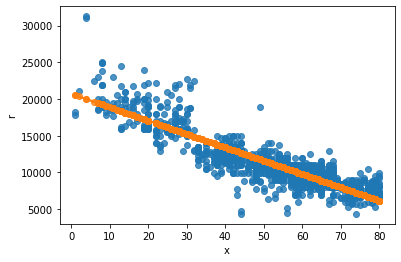

In [ ]:
sns.regplot(x = 'x',y = 'r',data = dataframe,fit_reg=False)#.set(xlim=(0,6),ylim=(0,6))

sns.regplot(x = 'x',y = predicted,data = dataframe)

In [ ]:
print(lin.measure(predicted,r))

3128407.902662737


In [ ]:
print(lin.measure(test_predicted,test_r))

1656754.5092644263
